# Libraries

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import to_categorical
import tensorflow as tf
import cv2
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load Dataset

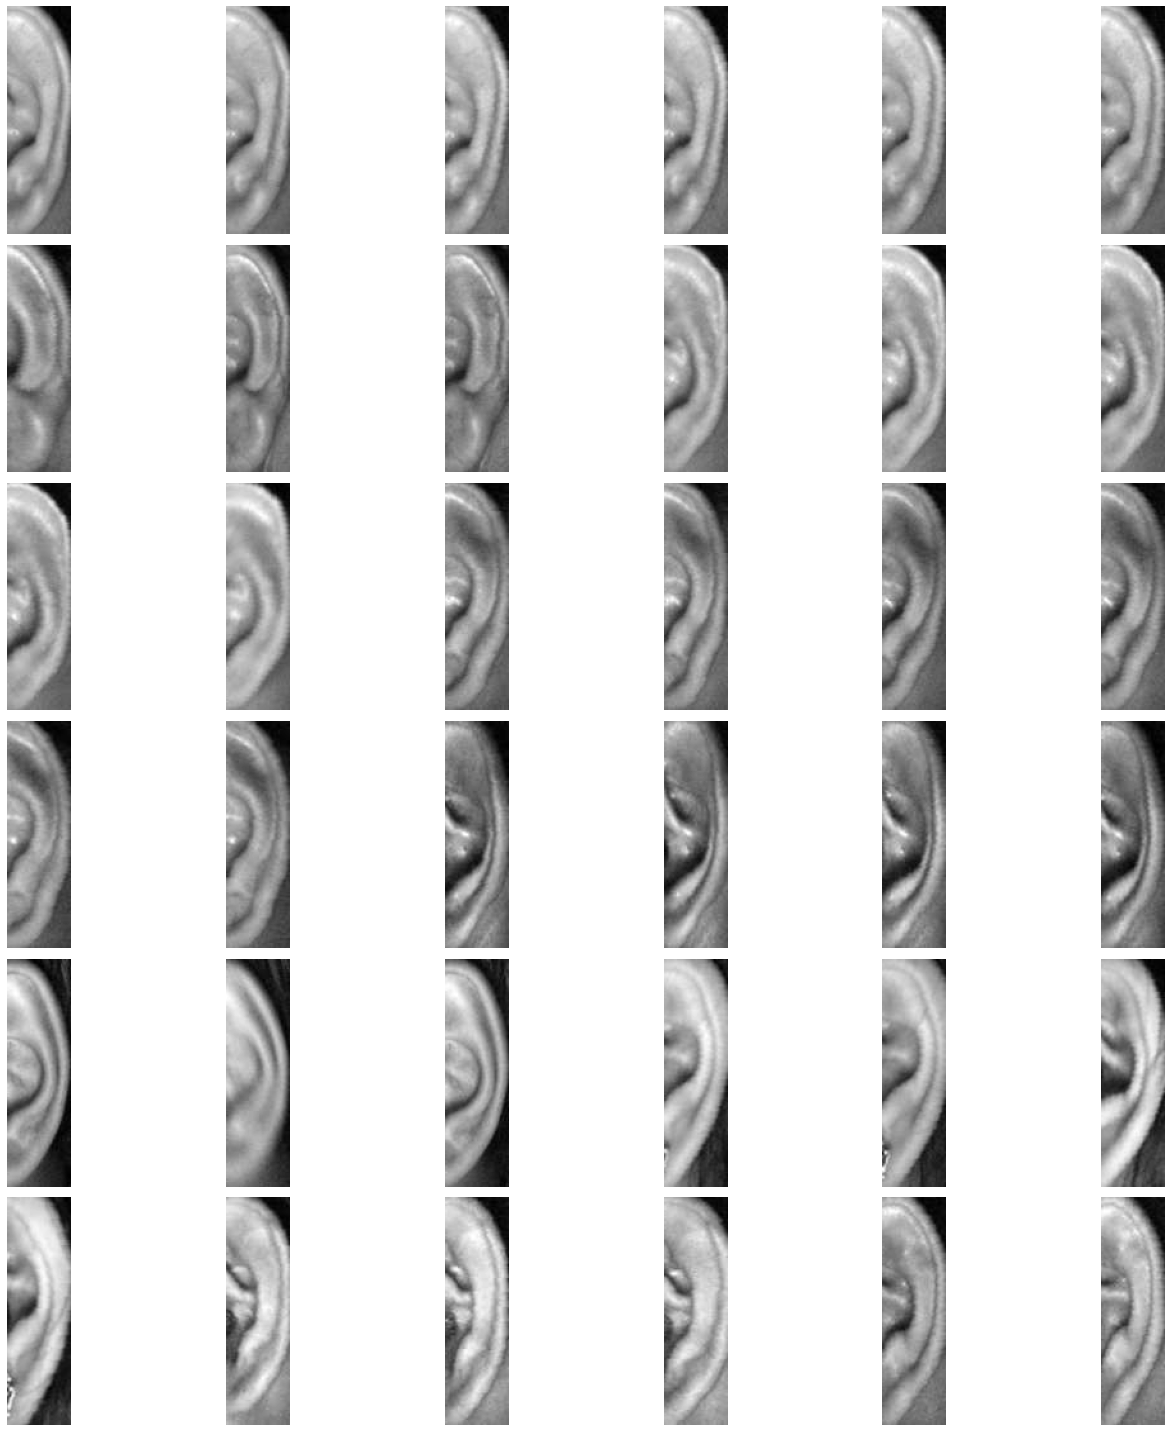

In [21]:
path=r'C:\Users\laouamer ilhem\TP programation\correct\iitdelhi\iitdelhi'
fig, axes = plt.subplots(6, 6, figsize=(20, 20))

dataset=[]

for root, _, files in os.walk(path):
    for filename in files:
        img_path = os.path.join(root, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dataset.append(img)
        
for i in range(6):
    for j in range(6):
        idx = i * 6 + j
        axes[i, j].imshow(dataset[idx], cmap='gray')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


# Pre-processing

In [3]:
path=r'C:\Users\laouamer ilhem\TP programation\correct\iitdelhi\iitdelhi'
dataset=[]
labels=[]
for root, _, files in os.walk(path):
    for filename in files:
        img_path = os.path.join(root, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dataset.append(img)

        # Extract the class label and instance number from the filename
        class_label, instance_number = filename.split('_')
        class_label = int(class_label)

        # Add the label to the labels list
        labels.append(class_label)

In [4]:
dataset=np.array(dataset)
labels=np.array(labels)

In [5]:
dataset.shape

(493, 180, 50)

In [6]:
labels.shape

(493,)

# Split Data

In [7]:
dataset = dataset.reshape(493, 180 * 50)

In [8]:
dataset.shape

(493, 9000)

In [9]:
x_train, x_test, y_train, y_test = train_test_split( dataset, labels, test_size = 0.3, stratify = labels)

In [10]:
print(x_train.shape, y_train.shape)

(345, 9000) (345,)


In [11]:
x_train = x_train/ 255
x_test = x_test/255

# KNN classifier

In [36]:
model = KNeighborsClassifier(n_neighbors = 3)

# Training the classifier
model.fit(x_train, y_train)

#Predict Output for the test
y_pred = model.predict(x_test)

In [37]:
#The model evaluation
print("\n Classification report of the model: \n",classification_report(y_test, y_pred))


 Classification report of the model: 
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.

D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Artificial Neural Network (ANN) classifier

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=500, activation='relu', input_shape=(9000,)))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=126, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
history=model.fit( x_train, y_train, epochs = 70, verbose=1)


Epoch 1/70
11/11 [==============================] - 3s 73ms/step - loss: 6.0342 - accuracy: 0.0000e+00
Epoch 2/70
11/11 [==============================] - 1s 67ms/step - loss: 5.0318 - accuracy: 0.0087
Epoch 3/70
11/11 [==============================] - 1s 66ms/step - loss: 4.8911 - accuracy: 0.0174
Epoch 4/70
11/11 [==============================] - 1s 71ms/step - loss: 4.8518 - accuracy: 0.0058
Epoch 5/70
11/11 [==============================] - 1s 70ms/step - loss: 4.7999 - accuracy: 0.0290
Epoch 6/70
11/11 [==============================] - 1s 66ms/step - loss: 4.8198 - accuracy: 0.0145
Epoch 7/70
11/11 [==============================] - 1s 68ms/step - loss: 4.7973 - accuracy: 0.0116
Epoch 8/70
11/11 [==============================] - 1s 70ms/step - loss: 4.7169 - accuracy: 0.0319
Epoch 9/70
11/11 [==============================] - 1s 67ms/step - loss: 4.6615 - accuracy: 0.0464
Epoch 10/70
11/11 [==============================] - 1s 66ms/step - loss: 4.6061 - accuracy: 0.0522
Epoch

In [14]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 13ms/step - loss: 1.1927 - accuracy: 0.7838


[1.1927127838134766, 0.7837837934494019]

# Applying PCA

# Principal Component Analysis (PCA) :
PCA is a fundamental dimensionality reduction technique widely used in various fields, including statistics, machine learning, and signal processing. PCA aims to simplify complex datasets by transforming them into a new coordinate system, revealing underlying patterns and reducing the number of variables while preserving as much relevant information as possible.

In essence, PCA works by identifying the directions (principal components) along which the data varies the most. These principal components are orthogonal to each other, meaning they are uncorrelated, and they capture the maximum variance present in the original data. The first principal component represents the direction of the highest variance, the second component represents the direction orthogonal to the first with the next highest variance, and so on.

We can describe the steps (PCA) as:

Given a dataset with n data points and d features, the goal of PCA is to find a set of k orthogonal unit vectors (principal components) in the d-dimensional feature space, where k ≤ d, that captures the maximum variance in the data.

###### 1. Standardization:
   Standardize the original n × d data matrix X to have a mean of zero and a standard deviation of one. This step is optional but often recommended to ensure that each feature contributes equally to the analysis.

###### 2. Covariance Matrix:
   Compute the covariance matrix C of the standardized data matrix X:
   
   `C = (1 / (n - 1)) ⋅ X^T X`

###### 3. Eigenvalue Decomposition:
   Calculate the eigenvectors and eigenvalues of the covariance matrix C. using the equation :
   
   `C ⋅ V = λ . V => (C - λI). V = 0 `

###### 4. Principal Components:
   Select the top k eigenvectors corresponding to the k largest eigenvalues to form the matrix V_k.

###### 5. Data Transformation:
   Transform the original data matrix X into a new n × k matrix Z by multiplying it with the matrix of selected eigenvectors:
   `Z = X ⋅ V_k`


In [42]:
pca = PCA(n_components = 125).fit(x_train)

x_PCA_train = pca.transform(x_train)
x_PCA_test = pca.transform(x_test)

# Fit the model
model.fit(x_PCA_train, y_train)

# Testing the classifier
y_pred_pca = model.predict(x_PCA_test)

In [43]:
print("\n Classification report of the model: \n",classification_report(y_test, y_pred_pca))


 Classification report of the model: 
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.

D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ANN Classifier

In [45]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=500, activation='relu', input_shape=(9000,)))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=126, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
history=model.fit( x_train, y_train, epochs = 70, verbose=1)


Epoch 1/70
11/11 [==============================] - 1s 69ms/step - loss: 6.2333 - accuracy: 0.0000e+00
Epoch 2/70
11/11 [==============================] - 1s 66ms/step - loss: 5.1169 - accuracy: 0.0058
Epoch 3/70
11/11 [==============================] - 1s 67ms/step - loss: 4.8920 - accuracy: 0.0145
Epoch 4/70
11/11 [==============================] - 1s 67ms/step - loss: 4.8499 - accuracy: 0.0058
Epoch 5/70
11/11 [==============================] - 1s 67ms/step - loss: 4.7833 - accuracy: 0.0232
Epoch 6/70
11/11 [==============================] - 1s 67ms/step - loss: 4.7068 - accuracy: 0.0290
Epoch 7/70
11/11 [==============================] - 1s 67ms/step - loss: 4.6757 - accuracy: 0.0261
Epoch 8/70
11/11 [==============================] - 1s 68ms/step - loss: 4.6535 - accuracy: 0.0319
Epoch 9/70
11/11 [==============================] - 1s 67ms/step - loss: 4.5408 - accuracy: 0.0551
Epoch 10/70
11/11 [==============================] - 1s 66ms/step - loss: 4.4436 - accuracy: 0.0609
Epoch

In [55]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 2s 427ms/step - loss: 0.8578 - accuracy: 0.8311


[0.8578228950500488, 0.8310810923576355]

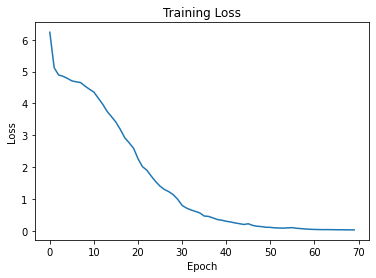

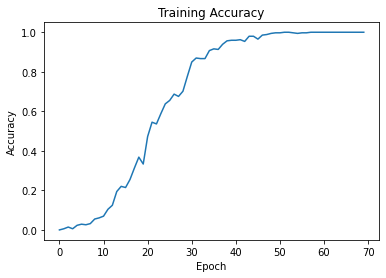

In [54]:
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


# Applying BSIF feature extractor

# Binary Similarity-based Image Features (BSIF)

Binary Similarity-based feature is a texture descriptor and feature extraction technique used in computer vision and image processing. BSIF is particularly useful for tasks that involve texture recognition, facial expression analysis, and texture-based object recognition. It aims to capture local patterns and textures within an image by analyzing the distribution of binary values in small image neighborhoods. BSIF operates by convolving an image with a set of pre-defined binary filters that are derived from `Gaussian filters`.Each filter is typically consisting of -1 and 1, representing the filter's spatial distribution.


In [2]:
np.seterr(over='ignore', under='ignore')

def bsif(img, texturefilters_path, mode = ''):
    texturefilters = np.load(texturefilters_path)
    numScl = texturefilters.shape[2]
    codeImg = np.ones(img.shape)
    r = int(np.floor(texturefilters.shape[0] / 2))
    upimg = img[0:r, :]
    btimg = img[-r:, :]
    lfimg = img[:, 0: r]
    rtimg = img[:, -r:]
    cr11 = img[0:r, 0: r]
    cr12 = img[0:r, -r:]
    cr21 = img[-r:, 0: r]
    cr22 = img[-r:, -r:]
    imgWrap = np.zeros((img.shape[0] + 2*r, img.shape[1] + 2*r))
    imgWrap[:r, :r] = cr22; imgWrap[:r, r:img.shape[1] + r] = btimg; imgWrap[:r, img.shape[1] + r:img.shape[1] + 2*r] = cr21
    imgWrap[r:img.shape[0] + r, 0:r] = rtimg
    imgWrap[r:img.shape[0] + r, r:img.shape[1] + r] = img
    imgWrap[r:img.shape[0] + r, img.shape[1] + r:img.shape[1] + 2*r] = lfimg
    imgWrap[img.shape[0] + r:img.shape[0] + 2*r, :r] = cr12; imgWrap[img.shape[0] + r:img.shape[0] + 2*r, r:img.shape[1] + r] = upimg; imgWrap[img.shape[0] + r:img.shape[0] + 2*r, img.shape[1] + r:img.shape[1] + 2 * r] = cr11
    for i in range(0, numScl):
        tmp = texturefilters[:, :, numScl - (i + 1)]
        ci = signal.convolve2d(imgWrap, np.rot90(tmp, 2), mode='valid')
        ci = (ci > 0) * (2**i)
        codeImg = codeImg + ci
    if mode == 'h':
        bsifdescription = np.zeros((2**numScl))
        for i in range(0, (2**numScl)): bsifdescription[i] = (codeImg == (i + 1)).sum()
        return bsifdescription
    if mode == 'nh':
        bsifdescription = np.zeros(2 ** numScl)
        for i in range(0, 2 ** numScl): bsifdescription[i] = (codeImg == i).sum()
        bsifdescription = bsifdescription / np.max(bsifdescription)
        return bsifdescription
    else:
        return codeImg

def show_image(image):
    matplotlib.use('TkAgg')
    plt.figure()
    imgplot = plt.imshow(image, cmap='gray')
    plt.show()

In [3]:
from scipy import signal

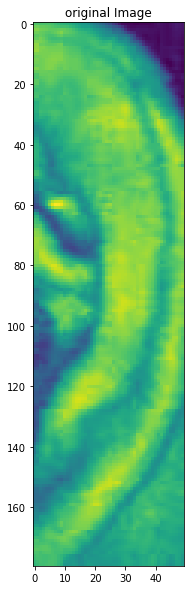

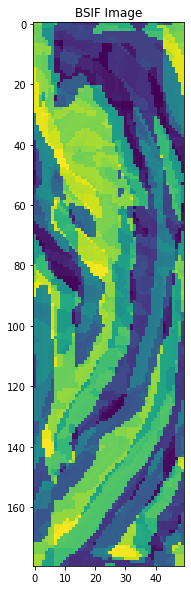

In [14]:
bsif_filter =r'C:\Users\laouamer ilhem\TP programation\correct\bsif python\bsif python\filters\ICAtextureFilters_15x15_12bit.npy' #local path of Bsif filter
img = cv2.imread(r'C:\Users\laouamer ilhem\TP programation\correct\iitdelhi\iitdelhi\008_3.bmp') #local path of iitdelhi dataset
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_bsif = bsif(img, bsif_filter)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title('original Image')
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(img_bsif)
plt.title('BSIF Image')
plt.show()

In [92]:
img.shape

(180, 50)

### apply bsif feature extractor with entire data 

In [96]:
data_bsif=[]
for data_samples in dataset:
    data_bsif.append(bsif(data_samples, bsif_filter,'h'))
    
data_bsif = np.array(data_bsif)

In [97]:
data_bsif.shape

(493, 4096)

In [ ]:
data_bsif[0].shape

In [105]:
x_train_bsif, x_test_bsif, y_train_bsif, y_test_bsif = train_test_split(data_bsif, labels, test_size = 0.3, stratify = labels)

# Bsif + Knn

In [102]:
model = KNeighborsClassifier(n_neighbors = 3)

model.fit(x_train_bsif, y_train_bsif)

# Testing the classifier
y_pred = model.predict(x_test_bsif)


In [103]:
print("\n Classification report of the model: \n",classification_report(y_test_bsif, y_pred))


 Classification report of the model: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.

D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\emp\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Bsif + ANN

In [106]:
y_train_bsif = to_categorical(y_train_bsif)
y_test_bsif = to_categorical(y_test_bsif)

In [110]:
x_train_bsif.shape

(345, 4096)

In [126]:
x_train_bsif = x_train_bsif/ 255
x_test_bsif = x_test_bsif/255

In [135]:
model = Sequential()

# Add layers to the model
model.add(Dense(units=512, activation='relu', input_shape=(4096,)))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=126, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# fit the model
history=model.fit( x_train_bsif, y_train_bsif, epochs = 10, verbose=1)

Epoch 1/10
11/11 [==============================] - 1s 60ms/step - loss: 4.8447 - accuracy: 0.0174
Epoch 2/10
11/11 [==============================] - 1s 53ms/step - loss: 4.6684 - accuracy: 0.1884
Epoch 3/10
11/11 [==============================] - 1s 51ms/step - loss: 4.4263 - accuracy: 0.1275
Epoch 4/10
11/11 [==============================] - 1s 53ms/step - loss: 3.9153 - accuracy: 0.3826
Epoch 5/10
11/11 [==============================] - 1s 52ms/step - loss: 3.2455 - accuracy: 0.5304
Epoch 6/10
11/11 [==============================] - 1s 60ms/step - loss: 2.4334 - accuracy: 0.6783
Epoch 7/10
11/11 [==============================] - 1s 52ms/step - loss: 1.5906 - accuracy: 0.8725
Epoch 8/10
11/11 [==============================] - 1s 57ms/step - loss: 0.8920 - accuracy: 0.9362
Epoch 9/10
11/11 [==============================] - 1s 61ms/step - loss: 0.4524 - accuracy: 0.9942
Epoch 10/10
11/11 [==============================] - 1s 54ms/step - loss: 0.2276 - accuracy: 0.9942


In [136]:
model.evaluate(x_test_bsif, y_test_bsif)

5/5 [==============================] - 0s 10ms/step - loss: 0.6146 - accuracy: 0.9324


[0.6146399974822998, 0.9324324131011963]

# Summary 

Incorporating both Principal Component Analysis (PCA) and Binary Similarity-based Image Features (BSIF) into the classification process has proven to enhance the overall classification results significantly. we attribute this by 

- Applying PCA to the dataset has resulted in a notable reduction in overfitting. By transforming the original data into a lower-dimensional space, PCA effectively eliminates irrelevant and redundant features, thus mitigating the risk of overfitting. This reduction in complexity retains only the most informative features, facilitating better generalization of the classifier to unseen data instances. As a result, the classification model becomes more robust and capable of maintaining high performance on new, diverse samples.

- The integration of the BSIF descriptor has proven to be instrumental in enhancing classification outcomes. The BSIF technique excels at extracting intricate texture patterns and vital characteristics from the data. By highlighting the most distinctive points and texture-related details within the images, BSIF empowers the classifier to differentiate between classes more effectively.